## Customer Churn

In [10]:
# Импорт библиотек

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
import joblib

# Работа с графиками
import matplotlib.pyplot as plt
import seaborn as sns

# Отключаем лишние предупреждения
import warnings
warnings.filterwarnings('ignore')

## Описание данных


**Колонки данных:**

* `customerID` - ID клиента
* `gender` - Пол клиента
* `SeniorCitizen` - Является ли клиент пенсионером
* `Partner` - Есть ли у клиента партнер
* `Dependents` - Есть ли у клиента иждивенцы
* `tenure` - Сколько месяцев клиент оставался с компанией
* `PhoneService` - Использует ли клиент телефонные услуги
* `MultipleLines` - Использует ли клиент несколько телефонных линий
* `InternetService` - Подключил ли клиент интернет и какой
* `OnlineSecurity` - Подключил ли клиент онлайн безопасность
* `OnlineBackup` - Использует ли клиент онлайн бэкап
* `DeviceProtection` - Есть ли у клиента страховка оборудования
* `TechSupport` - Использовал ли клиент техническую поддержку
* `StreamingTV` - Использует ли клиент стриминговое ТВ
* `StreamingMovies` - Использует ли клиент стриминговые платформы
* `Contract` - Тип контракта клиента
* `PaperlessBilling` - Использует ли клиент безбумажное оформление счетов
* `PaymentMethod` - Способ оплаты
* `MonthlyCharges` - Размер текущей ежемесечной оплаты
* `TotalCharges` - Сколько в сумме уплачено клиентом
* `Churn` - Ушел клиент или нет

В реальном бизнесе такая информация как пенсионный статус, наличие иждивенцев или партнера у клиента, скорее всего, будет недоступна.


## Получение данных

In [11]:
# Загрузка данных
df = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [11]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
# Удалим колонку с ID клиентов
df.drop(['customerID'], axis=1, inplace=True)
# Преобразуем метрику в числовой вид, где 0 - клиент остался, 1 - клиент ушёл
df['Churn'] = LabelEncoder().fit_transform(df['Churn'])
# Колонка TotalCharges состоит из чисел в формате string и содержит несколько пустых строк.
# Преобразуем числа в float и заменим пустые значения средними
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: None if x == ' ' else float(x))
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)
# Приведение названий признаков к единому формату имен
df.rename(columns={'gender': 'Gender', 'tenure': 'Tenure'}, inplace=True)

## Анализ данных

In [7]:
# Анализ данных
print(f"Размер данных: {df.shape}")
print(f"\nИнформация о данных:")
print(df.info())
print(f"\nКоличество уникальных значений в столбцах:")
print(df.describe())

df.nunique()

Размер данных: (7043, 20)

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   Tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 

Gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
Tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

[Text(0, 0, '5174 (73%)'), Text(0, 0, '1869 (27%)')]

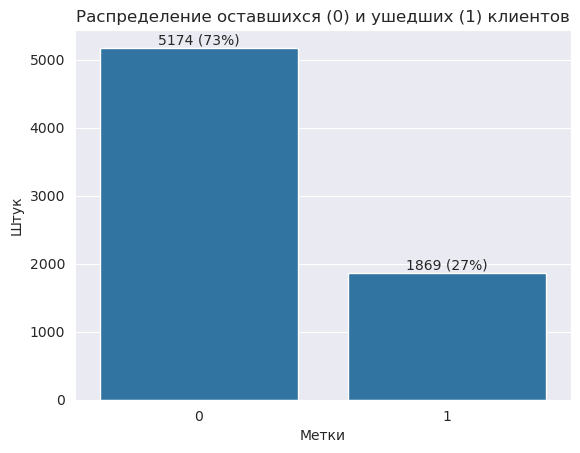

In [4]:
ax = sns.countplot(data=df, x='Churn');
plt.xlabel('Метки')
plt.ylabel('Штук')
plt.title("Распределение оставшихся (0) и ушедших (1) клиентов");

abs_values = df['Churn'].value_counts(ascending=False)
rel_values = df['Churn'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

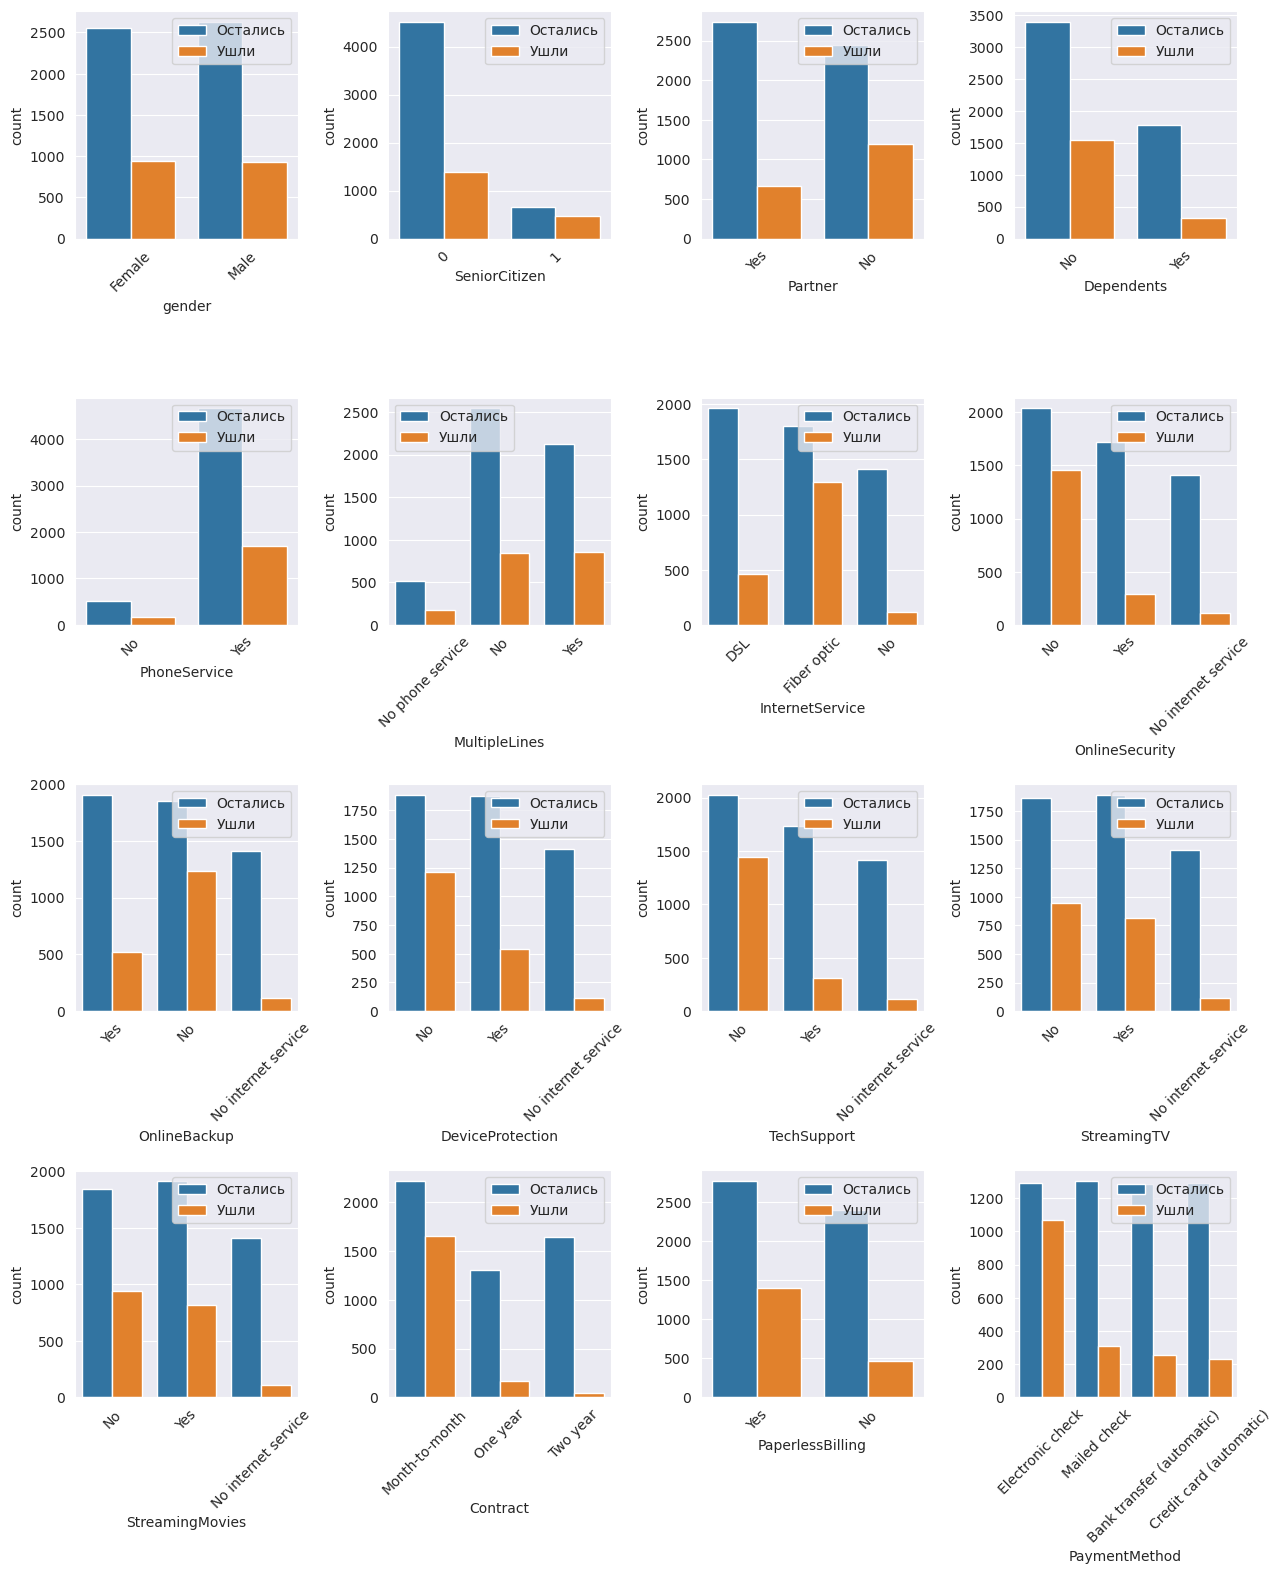

In [5]:
cols = ['Gender',
        'SeniorCitizen',
        'Partner',
        'Dependents',
        'PhoneService',
        'MultipleLines',
        'InternetService',
        'OnlineSecurity',
        'OnlineBackup',
        'DeviceProtection',
        'TechSupport',
        'StreamingTV',
        'StreamingMovies',
        'Contract',
        'PaperlessBilling',
        'PaymentMethod']

plt.figure(figsize=(15, 18))
# fig, axes = plt.subplots(4, 4)
for i, col in enumerate(cols):
    ax = plt.subplot(4, 4, i + 1)
    sns.countplot(data=df, x=col, hue='Churn')
    # plt.title(col.capitalize())
    plt.legend(['Остались', 'Ушли'])
    plt.xticks(rotation=45)
plt.subplots_adjust(wspace=0.4, hspace=0.7)

Выводы, которые можно сделать из анализа графиков:

* gender: Пол не даёт никакой полезной информации
* Internet Service: Большая доля ушедших клиентов среди пользователей оптоволоконного подключения сети интернет, чем тех, кто был подключен
* Contract: Среди различных сроков заключения контракта большая доля ушедших видна среди тех, кто заключал контракт только на месяц.
* Tech Support: Большая часть ушедших пользователей НЕ обращалась в техническую поддержку.
* Payment Method: Большая доля ушедших клиентов среди тех, кто рассчитывался электронным чеком.

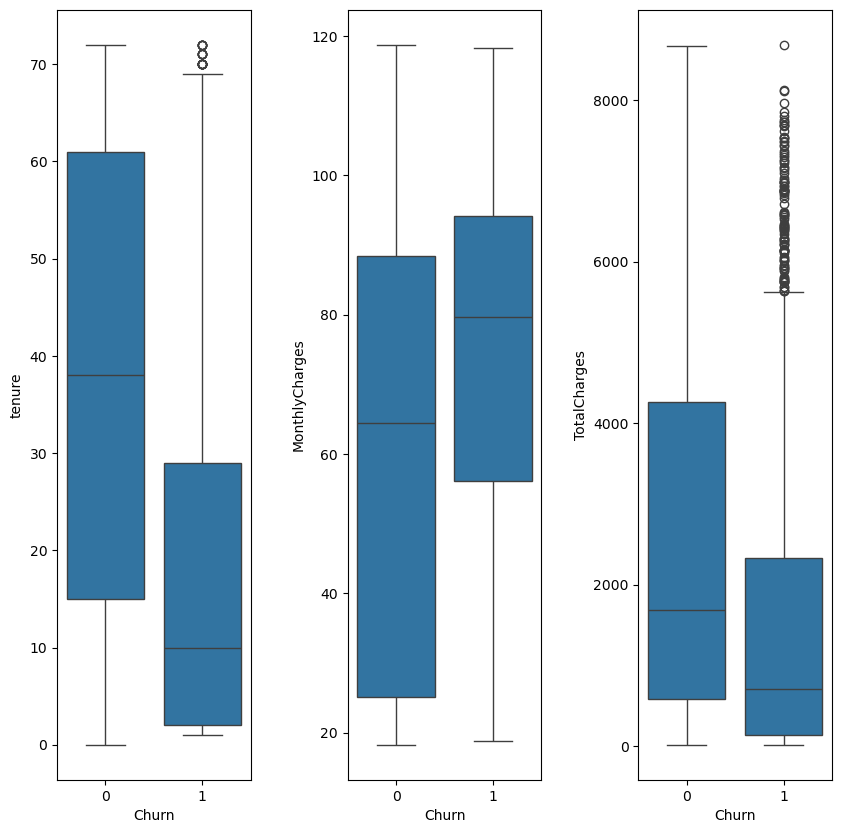

In [42]:
cols = ['Tenure',
        'MonthlyCharges',
        'TotalCharges']

plt.figure(figsize=(10, 10))
for i, col in enumerate(cols):
    ax = plt.subplot(1, 3, i + 1)
    sns.boxplot(data=df, x="Churn", y=col)
plt.subplots_adjust(wspace=0.5, hspace=0.5)

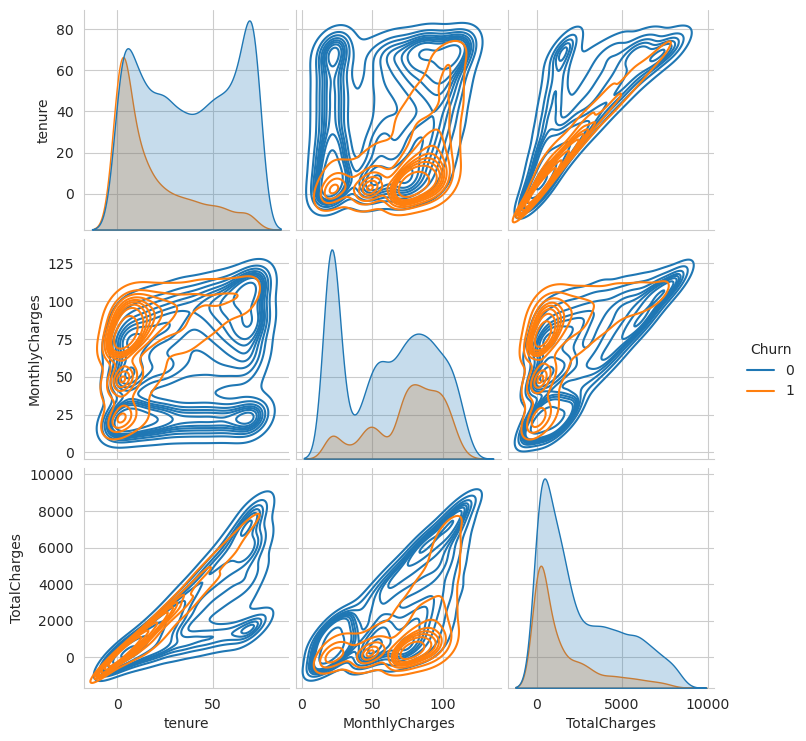

In [27]:
sns.pairplot(df, x_vars=['Tenure', 'MonthlyCharges', 'TotalCharges'], y_vars=['tenure', 'MonthlyCharges', 'TotalCharges'], hue='Churn', kind="kde")

Text(0, 0.5, 'Траты')

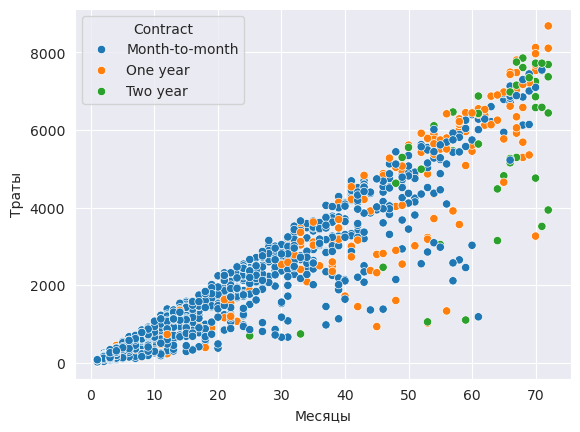

In [82]:
# plt.figure(figsize=(10, 10))
sns.scatterplot(x=df['Tenure'], y=df[df['Churn'] == 1]['TotalCharges'], hue=df['Contract'])
plt.xlabel('Месяцы')
plt.ylabel('Траты')

Text(0, 0.5, 'Траты')

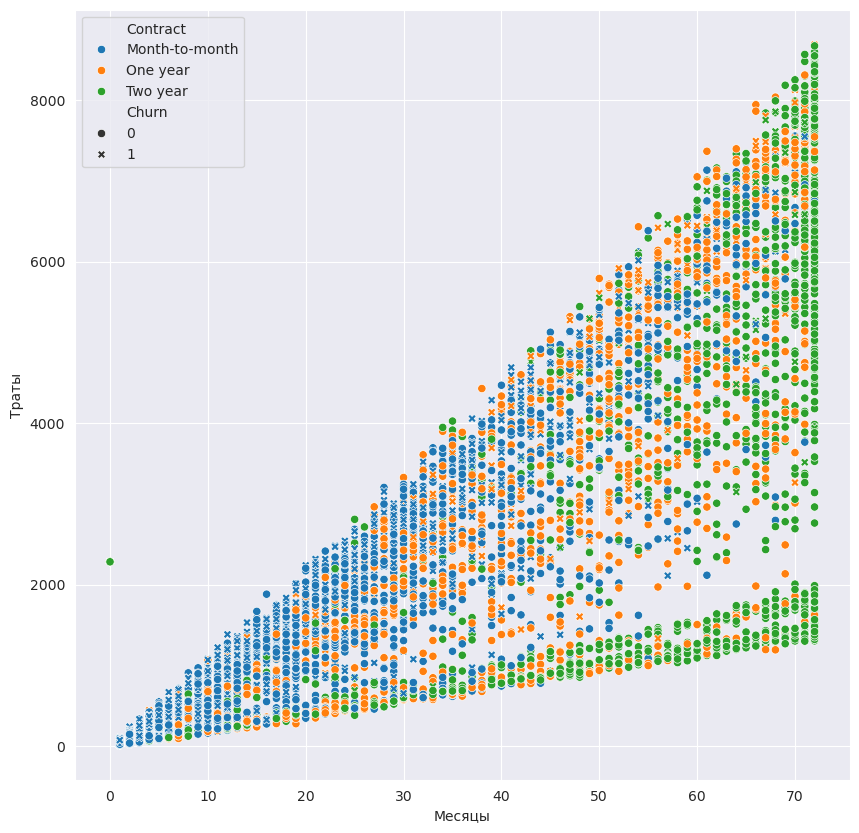

In [84]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df, x='Tenure', y='TotalCharges', hue='Contract', style='Churn')
plt.xlabel('Месяцы')
plt.ylabel('Траты')

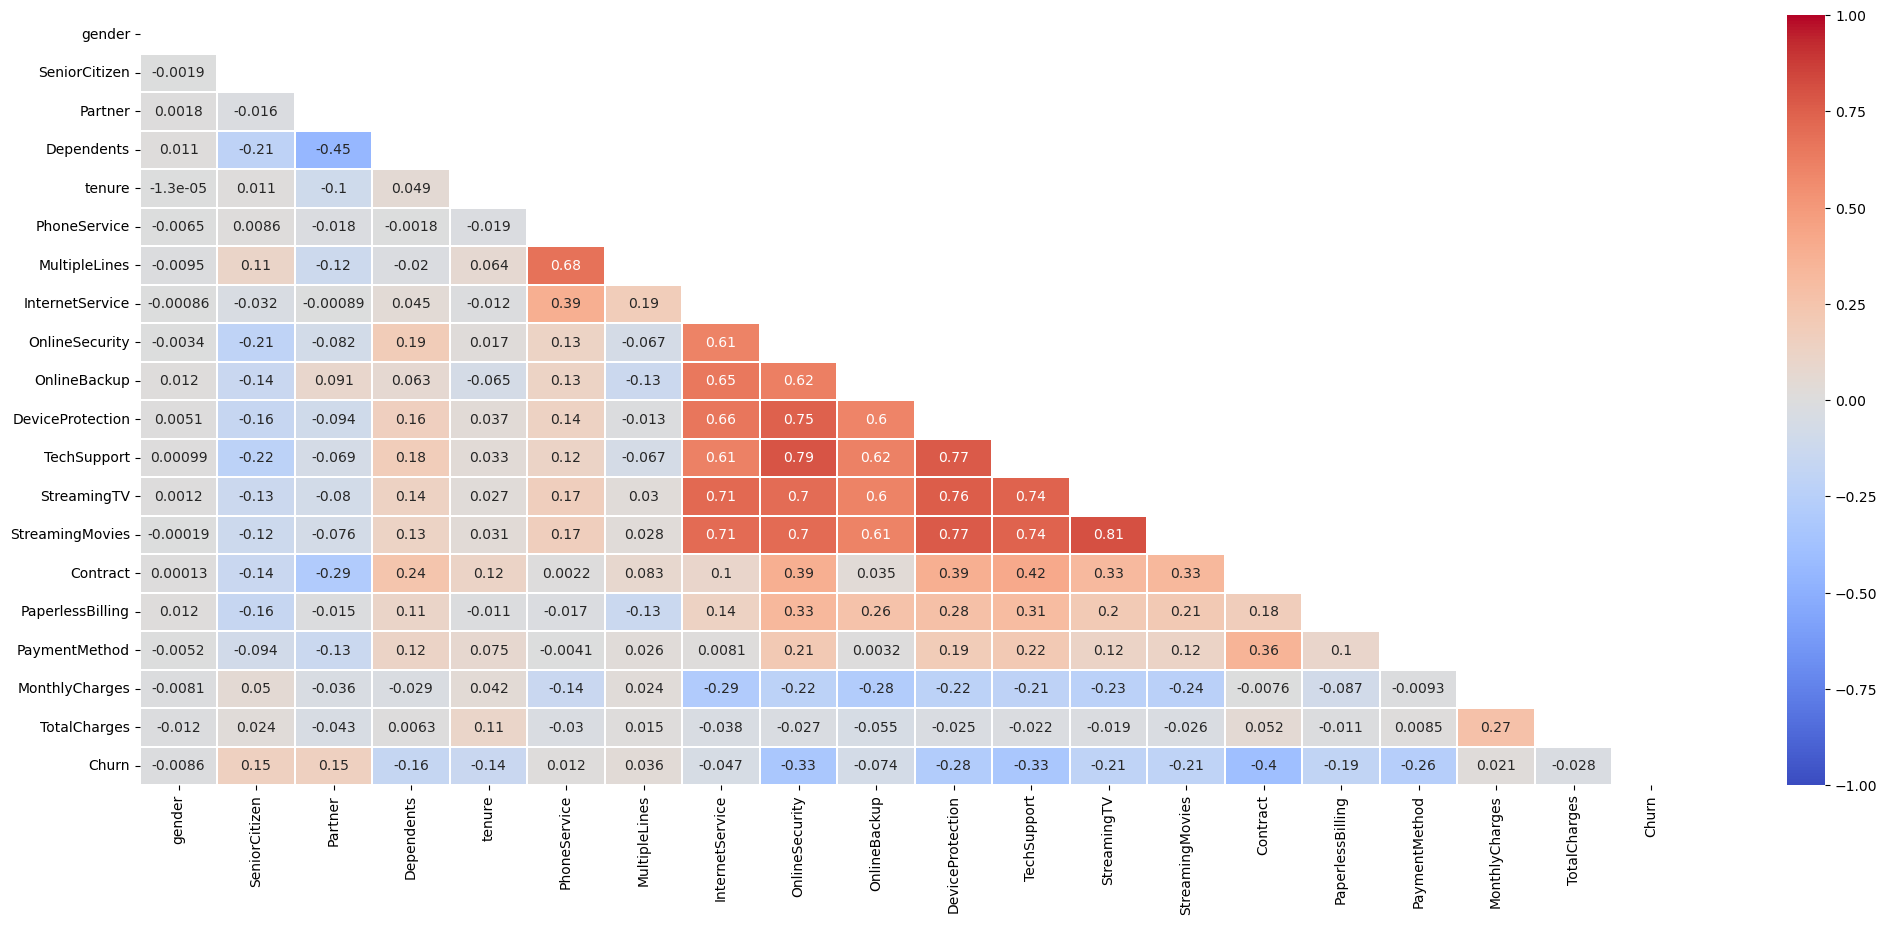

In [21]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

## Подготовка данных

In [13]:
# Определим вектор меток
y = df['Churn'].to_numpy()

# Соберем количественные признаки в отдельную матрицу
X_mms = df[['Tenure', 'MonthlyCharges', 'TotalCharges']].to_numpy()

# Все колонки, с небольшим количеством уникальных элементов кодируем через OneHotEncoder
# Список названий колонок для OHE
cols_to_ohe = df.columns.drop(['Churn', 'Gender', 'Tenure', 'MonthlyCharges', 'TotalCharges'])
# Компактный список названий колонок для OHE
cols_to_ohe_small = ['Contract', 'PaymentMethod']

# Применяем OneHotEncoding к базовому набору признаков
ohe = OneHotEncoder()
# ohe.fit(df[cols_to_ohe])
X_ohe = ohe.fit_transform(df[cols_to_ohe]).toarray()

# Применяем OneHotEncoding к компактному набору признаков
ohe_small = OneHotEncoder()
# ohe_small.fit(df[cols_to_ohe_small])
X_ohe_small = ohe_small.fit_transform(df[cols_to_ohe_small]).toarray()

# Собираем категориальные и количественные признаки
X = np.concatenate((X_ohe, X_mms), axis=1)
X_small = np.concatenate((X_ohe_small, X_mms), axis=1)

# Разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43, stratify=y, shuffle=True)
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(X_small, y, test_size=0.2, random_state=43, stratify=y, shuffle=True)

# Нормализуем количественные признаки отдельно в обучающей и тестовой выборках
mms = MinMaxScaler()
X_train[:, -3:] = mms.fit_transform(X_train[:, -3:])
X_test[:, -3:] = mms.transform(X_test[:, -3:])

mms_small = MinMaxScaler()
X_train_small[:, -3:] = mms_small.fit_transform(X_train_small[:, -3:])
X_test_small[:, -3:] = mms_small.transform(X_test_small[:, -3:])

# Для борьбы с дисбалансом классов применим оверсемплинг
from imblearn.over_sampling import RandomOverSampler

over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)

X_small_over, y_small_over = over_sampler.fit_resample(X_train_small, y_train_small)


print('Размерность X_train:', X_train.shape)
print('------------------------------------')
print('Размерность X_train_small:', X_train_small.shape)
print('------------------------------------')
print('Размерность X_train_over:', X_train_over.shape)
print('------------------------------------')
print('Размерность X_small_over:', X_small_over.shape)

Размерность X_train: (5634, 44)
------------------------------------
Размерность X_train_small: (5634, 10)
------------------------------------
Размерность X_train_over: (8278, 44)
------------------------------------
Размерность X_small_over: (8278, 10)


In [3]:
y = df['Churn'].to_numpy()

norm_data = df.drop(['Churn', 'Gender'], axis=1).copy()

In [4]:
X_mms = df[['Tenure', 'MonthlyCharges', 'TotalCharges']].to_numpy()

In [221]:
# Все колонки, с небольшим количеством уникальных элементов кодируем через OneHotEncoder
cols_to_ohe = ['Contract', 'PaymentMethod']
# cols_to_ohe = norm_data.columns.drop(['Tenure', 'MonthlyCharges', 'TotalCharges'])

ohe = OneHotEncoder()
ohe.fit(norm_data[cols_to_ohe])
X_ohe = ohe.transform(norm_data[cols_to_ohe]).toarray()

print('Размерность X_ohe:', X_ohe.shape)
print('Строка закодированных данных:', X_ohe[0])
print('Закодированные колонки:', *cols_to_ohe)

Размерность X_ohe: (7043, 7)
Строка закодированных данных: [1. 0. 0. 0. 0. 1. 0.]
Закодированные колонки: Contract PaymentMethod


In [ ]:
joblib.dump(ohe, '../models/OneHotEncoder.pkl')

In [ ]:
X = np.concatenate((X_ohe, X_mms), axis=1)

In [223]:
# cols_to_LE = norm_data.columns.drop(['tenure', 'MonthlyCharges', 'TotalCharges'])
#
# LE = LabelEncoder()
# for col in cols_to_LE:
#     norm_data[col] = LE.fit_transform(norm_data[col])
#
# X_LE = norm_data[cols_to_LE].to_numpy()
#
# print('Размерность X_LE:', X_LE.shape)
# print('Строка закодированных данных:', X_LE[0])
# print('Закодированные колонки:', *cols_to_LE)

Размерность X_LE: (7043, 15)
Строка закодированных данных: [0 1 0 0 1 0 0 2 0 0 0 0 0 1 2]
Закодированные колонки: SeniorCitizen Partner Dependents PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod


In [224]:
# X_trees = np.concatenate((X_LE, X_mms), axis=1)

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43, stratify=y, shuffle=True)
# X_trees_train, X_trees_test, y_trees_train, y_trees_test = train_test_split(X_trees, y, test_size=0.2, random_state=43, stratify=y, shuffle=True)

In [226]:
mms = MinMaxScaler()
X_train[:, -3:] = mms.fit_transform(X_train[:, -3:])
X_test[:, -3:] = mms.transform(X_test[:, -3:])

In [ ]:
joblib.dump(mms, '../models/MinMaxScaler.pkl')

In [ ]:
# Семплирование данных
from imblearn.over_sampling import RandomOverSampler

over_sampler = RandomOverSampler(random_state=42)
X_over, y_over = over_sampler.fit_resample(X_train, y_train)

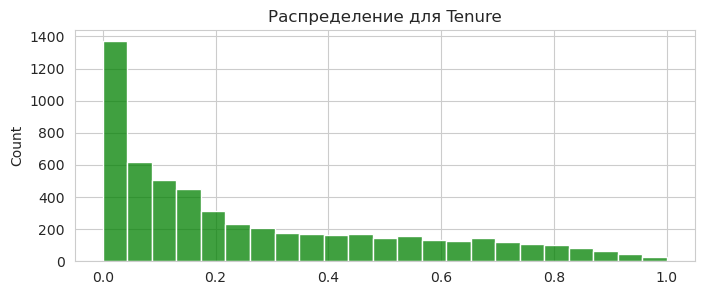

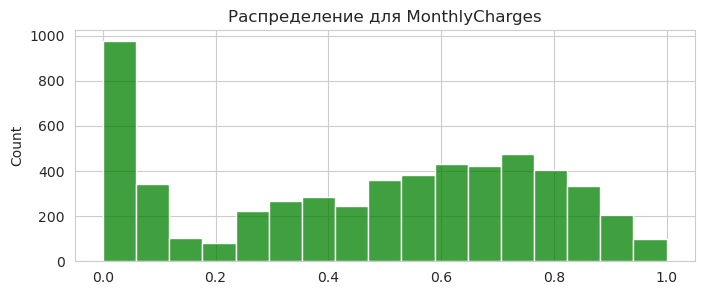

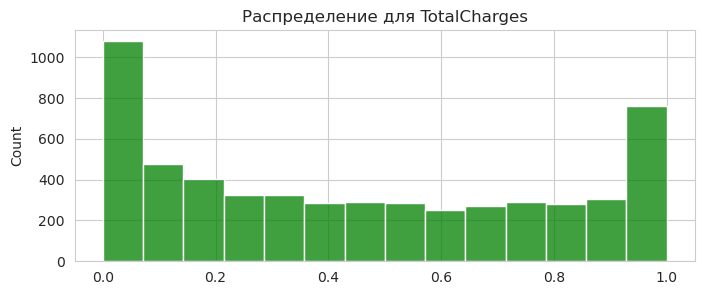

In [11]:
num_cols = ["Tenure", 'MonthlyCharges', 'TotalCharges']
for i, feat in enumerate(num_cols):
    plt.figure(figsize=(8,3))
    plt.title(f"Распределение для {feat}")
    ax = sns.histplot(X_train[:, -(i+1)], color='g')

## Обучение моделей

Для оценки качества предсказаний модели будем считать ROC-AUC score.

**Список использованных моделей:**

* Naive Bayes Classifier
* KNN
* SVC
* Logistic Regression
* Decision Tree Classifier
* Random Forest
* XGBoost Classifier
* CatBoost Classifier

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.model_selection import cross_val_score, cross_validate

### Все вместе по очереди

Для выбранных моделей подберем оптимальные гиперпараметры, а затем обучим их последовательно на 4-х вариантах наборов данных.

In [6]:
models = {
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(max_depth=7, max_leaf_nodes=20),
    'Random Forest': RandomForestClassifier(n_estimators=500, max_depth=10, max_leaf_nodes=30, random_state=0, n_jobs=-1),
    'CatBoost': CatBoostClassifier(
    iterations=200,
    learning_rate=0.05,
    depth=3,
    logging_level="Silent",
    random_seed=42,
),
    'Extreme Gradient Boosting': XGBClassifier(
        n_estimators=244,
        max_depth=1,
        min_child_weight=19,
        scale_pos_weight=1,
        subsample=0.6,
        colsample_bytree=0.6)
}

datasets = {
    'X_train': (X_train, y_train),
    'X_train_small': (X_train_small, y_train_small),
    'X_train_over': (X_train_over, y_train_over),
    'X_small_over': (X_small_over, y_small_over)
}

for dataset_name, dataset in datasets.items():
    print(f'Тренировка на {dataset_name}')
    results = {}
    for name, model in models.items():
        cv_scores = cross_val_score(model, dataset[0], dataset[1], cv=5, scoring='roc_auc')
        results[name] = cv_scores.mean()
        print(f"{name}: AUC = {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

    # Выбор лучшей модели
    best_model_name = max(results, key=results.get)
    print(f"\nЛучшая модель: {best_model_name}")
    print()

Тренировка на X_train
Naive Bayes: Recall = 0.8122 (+/- 0.0138)
KNN: Recall = 0.7629 (+/- 0.0133)
SVM: Recall = 0.7872 (+/- 0.0147)
Logistic Regression: Recall = 0.8394 (+/- 0.0112)
Decision Tree: Recall = 0.8080 (+/- 0.0158)
Random Forest: Recall = 0.8389 (+/- 0.0130)
CatBoost: Recall = 0.8436 (+/- 0.0118)
Extreme Gradient Boosting: Recall = 0.8423 (+/- 0.0141)

Лучшая модель: CatBoost

Тренировка на X_train_small
Naive Bayes: Recall = 0.8048 (+/- 0.0071)
KNN: Recall = 0.7838 (+/- 0.0030)
SVM: Recall = 0.7797 (+/- 0.0112)
Logistic Regression: Recall = 0.8245 (+/- 0.0094)
Decision Tree: Recall = 0.8114 (+/- 0.0110)
Random Forest: Recall = 0.8291 (+/- 0.0094)
CatBoost: Recall = 0.8330 (+/- 0.0086)
Extreme Gradient Boosting: Recall = 0.8326 (+/- 0.0106)

Лучшая модель: CatBoost

Тренировка на X_train_over
Naive Bayes: Recall = 0.8188 (+/- 0.0082)
KNN: Recall = 0.8393 (+/- 0.0153)
SVM: Recall = 0.8479 (+/- 0.0073)
Logistic Regression: Recall = 0.8439 (+/- 0.0041)
Decision Tree: Recall = 0

In [9]:
models = {
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    # 'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(max_depth=7, max_leaf_nodes=20),
    'Random Forest': RandomForestClassifier(n_estimators=500, max_depth=10, max_leaf_nodes=30, random_state=0, n_jobs=-1),
    'CatBoost': CatBoostClassifier(
    iterations=200,
    learning_rate=0.05,
    depth=3,
    logging_level="Silent",
    random_seed=42,
),
    'XGBoost': XGBClassifier(
        n_estimators=244,
        max_depth=1,
        min_child_weight=19,
        scale_pos_weight=1,
        subsample=0.6,
        colsample_bytree=0.6)
}

datasets = {
    'X_train': (X_train, y_train),
    'X_train_small': (X_train_small, y_train_small),
    'X_train_over': (X_train_over, y_train_over),
    'X_small_over': (X_small_over, y_small_over)
}

def fit_predict(models, dataset, X_test, y_test, dataset_name):
    print(f'Тренировка на {dataset_name}')
    results = {}
    for name, model in models.items():
        model.fit(dataset[0], dataset[1])
        y_pred= model.predict(X_test)
        y_pred_prob = model.predict_proba(X_test)[:,1]
        roc_auc = roc_auc_score(y_test, y_pred_prob)
        results[name] = roc_auc
        print(f"{name}: ROC-AUC = {roc_auc:.4f}")

    # Выбор лучшей модели
    best_model_name = max(results, key=results.get)
    print(f"\nЛучшая модель: {best_model_name}")
    print()
    return list(results.values())

results = []
results.append(fit_predict(models, datasets['X_train'], X_test, y_test, 'X_train'))
results.append(fit_predict(models, datasets['X_train_small'], X_test_small, y_test_small, 'X_train_small'))
results.append(fit_predict(models, datasets['X_train_over'], X_test, y_test, 'X_train_over'))
results.append(fit_predict(models, datasets['X_small_over'], X_test_small, y_test_small, 'X_small_over'))

Тренировка на X_train
Naive Bayes: ROC-AUC = 0.8365
KNN: ROC-AUC = 0.7880
Logistic Regression: ROC-AUC = 0.8647
Decision Tree: ROC-AUC = 0.8558
Random Forest: ROC-AUC = 0.8683
CatBoost: ROC-AUC = 0.8735
XGBoost: ROC-AUC = 0.8715

Лучшая модель: CatBoost

Тренировка на X_train_small
Naive Bayes: ROC-AUC = 0.8411
KNN: ROC-AUC = 0.8095
Logistic Regression: ROC-AUC = 0.8578
Decision Tree: ROC-AUC = 0.8598
Random Forest: ROC-AUC = 0.8669
CatBoost: ROC-AUC = 0.8695
XGBoost: ROC-AUC = 0.8673

Лучшая модель: CatBoost

Тренировка на X_train_over
Naive Bayes: ROC-AUC = 0.8368
KNN: ROC-AUC = 0.7766
Logistic Regression: ROC-AUC = 0.8658
Decision Tree: ROC-AUC = 0.8580
Random Forest: ROC-AUC = 0.8657
CatBoost: ROC-AUC = 0.8717
XGBoost: ROC-AUC = 0.8727

Лучшая модель: XGBoost

Тренировка на X_small_over
Naive Bayes: ROC-AUC = 0.8396
KNN: ROC-AUC = 0.7953
Logistic Regression: ROC-AUC = 0.8575
Decision Tree: ROC-AUC = 0.8487
Random Forest: ROC-AUC = 0.8618
CatBoost: ROC-AUC = 0.8689
XGBoost: ROC-AUC 

In [18]:
res_data = pd.DataFrame(np.array(results).transpose(), index=models.keys(), columns=datasets.keys())
res_data

,X_train,X_train_small,X_train_over,X_small_over
Naive Bayes,0.836526,0.841118,0.836836,0.839576
KNN,0.788004,0.809467,0.776645,0.795281
Logistic Regression,0.864690,0.857791,0.865819,0.857453
Decision Tree,0.855800,0.859792,0.857963,0.848706
Random Forest,0.868289,0.866857,0.865726,0.861776
CatBoost,0.873457,0.869493,0.871713,0.868940
XGBoost,0.871460,0.867325,0.872744,0.867717


<Axes: >

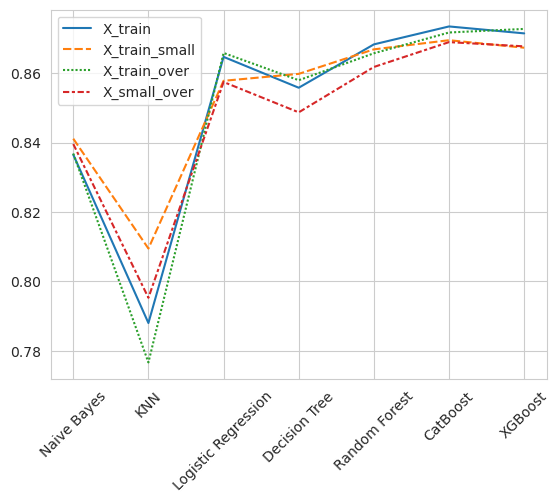

In [11]:
plt.xticks(rotation=45)
plt.legend(res_data.columns)
sns.lineplot(data=res_data)

Лучший ROC показывает модель категорильного градиентного бустинга на базовом наборе признаков X_train - 0.8735. Посмотрим на остальные метрики этой модели для семплированного компактного наборы данных и построим матрицу ошибок.

In [19]:
for res in range(len(results[0])):
    for rec in range(len(results)):
        print(f"{results[rec][res]:.4f}", end=' ')
    print()

0.8365 0.8411 0.8368 0.8396 
0.7880 0.8095 0.7766 0.7953 
0.8647 0.8578 0.8658 0.8575 
0.8558 0.8598 0.8580 0.8487 
0.8683 0.8669 0.8657 0.8618 
0.8735 0.8695 0.8717 0.8689 
0.8715 0.8673 0.8727 0.8677 


In [15]:
CB_model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.05,
    depth=3,
    logging_level="Silent",
    random_seed=42,
)
CB_model.fit(X_train_over, y_train_over)
CB_pred= CB_model.predict(X_test)
recall = recall_score(y_test, CB_pred)
y_pred_prob = CB_model.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("AUC категориального бустинга:", roc_auc)
report = classification_report(y_test, CB_pred)
print(report)

AUC категориального бустинга: 0.8717132966493579
              precision    recall  f1-score   support

           0       0.93      0.76      0.83      1035
           1       0.55      0.83      0.66       374

    accuracy                           0.78      1409
   macro avg       0.74      0.79      0.75      1409
weighted avg       0.83      0.78      0.79      1409



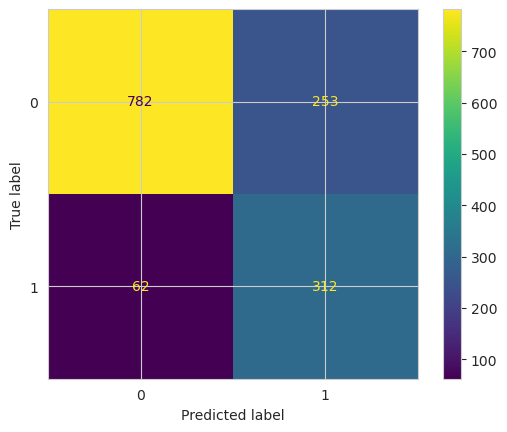

In [19]:
matrix = ConfusionMatrixDisplay.from_predictions(y_test_small, CB_pred)
plt.show()

### Наивный Байесовский классификатор

In [33]:
NB_model = GaussianNB()
NB_model.fit(X_small_over, y_small_over)
NB_pred= NB_model.predict(X_test_small)
report = classification_report(y_test_small, NB_pred)
recall = recall_score(y_test_small, NB_pred)
print("Полнота K-ближайших соседей:", recall)
print(report)

Полнота K-ближайших соседей: 0.9010695187165776
              precision    recall  f1-score   support

           0       0.94      0.60      0.74      1035
           1       0.45      0.90      0.60       374

    accuracy                           0.68      1409
   macro avg       0.70      0.75      0.67      1409
weighted avg       0.81      0.68      0.70      1409



In [ ]:
joblib.dump(NB_model, '../models/NB_model.pkl')

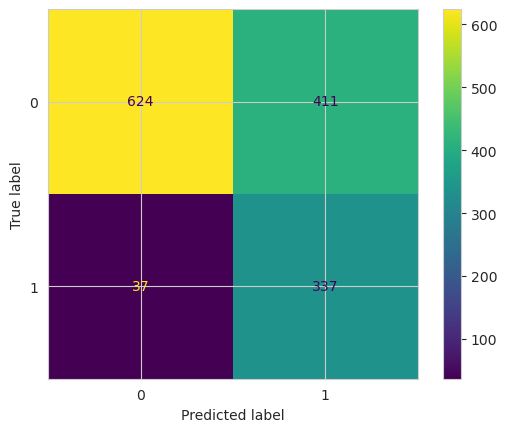

In [34]:
matrix = ConfusionMatrixDisplay.from_predictions(y_test, NB_pred)
plt.show()

### K-ближайших соседей

In [162]:
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train,y_train)
accuracy_KNN = KNN_model.score(X_test, y_test)
print("Точность K-ближайших соседей:", accuracy_KNN)
KNN_pred= KNN_model.predict(X_test)
report = classification_report(y_test, KNN_pred)
print(report)

Точность K-ближайших соседей: 0.765791341376863
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1035
           1       0.56      0.52      0.54       374

    accuracy                           0.77      1409
   macro avg       0.70      0.69      0.69      1409
weighted avg       0.76      0.77      0.76      1409



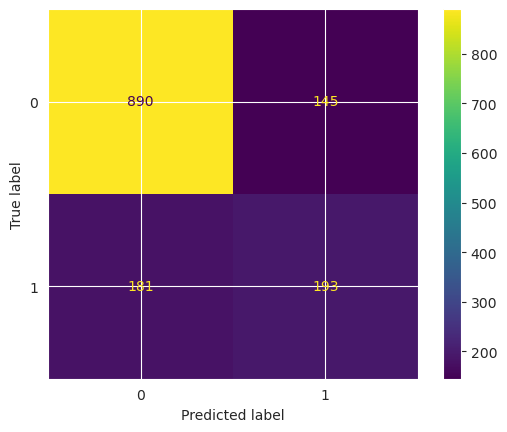

In [123]:
ConfusionMatrixDisplay.from_estimator(KNN_model, X_test, y_test)
plt.show()

### Метод опорных векторов

In [97]:
SVC_model = SVC()
SVC_model.fit(X_train_over, y_train_over)
accuracy_SVC = SVC_model.score(X_test, y_test)
print("Точность SVC:", accuracy_SVC)
SVC_pred= SVC_model.predict(X_test)
report = classification_report(y_test, SVC_pred)
print(report)

Точность SVC: 0.759403832505323
              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1035
           1       0.53      0.80      0.64       374

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.76      0.77      1409



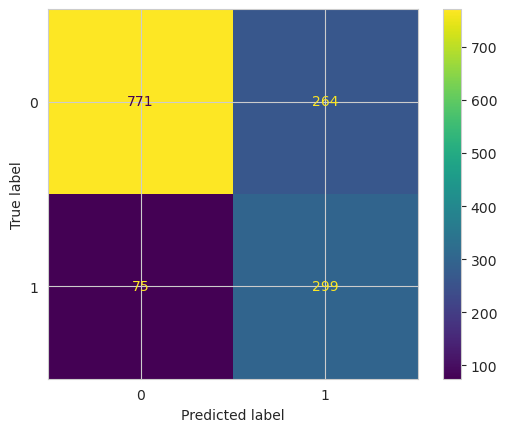

In [98]:
ConfusionMatrixDisplay.from_estimator(SVC_model, X_test, y_test)
plt.show()

### Логистическая регрессия

In [ ]:
LR_model = LogisticRegression()
LR_model.fit(X_over, y_over)
accuracy_LR = LR_model.score(X_test, y_test)
print("Точность логистической регрессии:", accuracy_LR)
LR_pred= LR_model.predict(X_test)
report = classification_report(y_test, LR_pred)
test_f1_score = f1_score(y_test, LR_pred)
recall = recall_score(y_test, LR_pred)
print('Полнота:', recall)
print(report)

In [ ]:
joblib.dump(LR_model, '../models/LR_model.pkl')

In [ ]:
LR_model.coef_[0][-10]

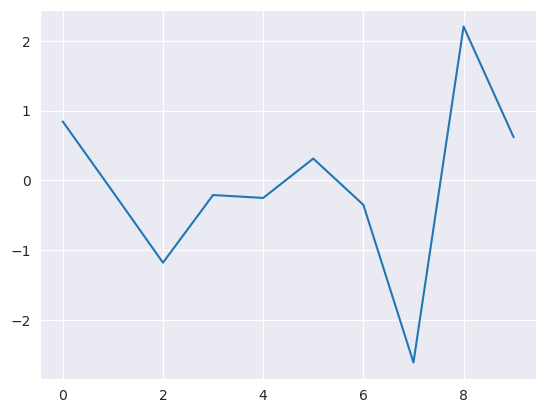

In [208]:
plt.plot(LR_model.coef_[0])

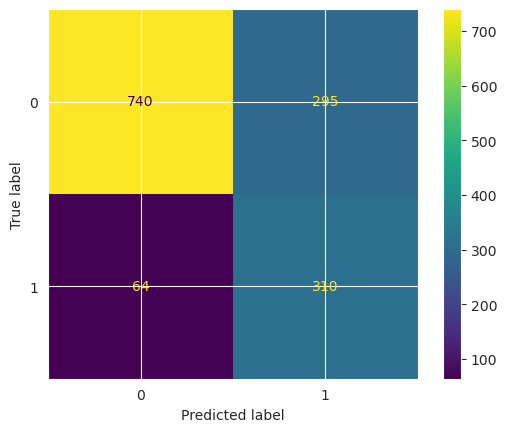

In [68]:
ConfusionMatrixDisplay.from_estimator(LR_model, X_test, y_test)
plt.show()

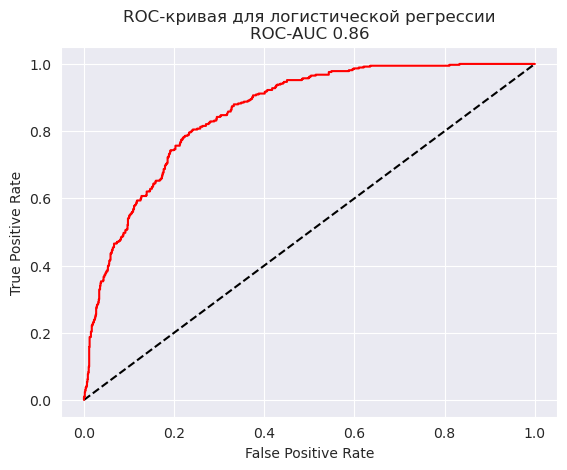

In [69]:
y_pred_prob = LR_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC-кривая для логистической регрессии\nROC-AUC {roc_auc:.2f}')
plt.show()

### Дерево решений

In [204]:
DT_model = DecisionTreeClassifier(max_depth=7, max_leaf_nodes=20)
DT_model.fit(X_over,y_over)
accuracy_DT = DT_model.score(X_test, y_test)
print("Точность дерева решений:", accuracy_DT)
DT_pred= DT_model.predict(X_test)
report = classification_report(y_test, DT_pred)
print(report)

Точность дерева решений: 0.7444996451383961
              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1035
           1       0.51      0.84      0.63       374

    accuracy                           0.74      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.74      0.76      1409



### Случайный лес

In [205]:
RF_model = RandomForestClassifier(n_estimators=500, max_depth=10, max_leaf_nodes=30, random_state=0, n_jobs=-1)
RF_model.fit(X_over,y_over)
y_pred_prob = RF_model.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("AUC случайного леса:", roc_auc)
RF_pred= RF_model.predict(X_test)
report = classification_report(y_test, RF_pred)
print(report)

Точность случайного леса: 0.7444996451383961
              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1035
           1       0.51      0.83      0.63       374

    accuracy                           0.74      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.74      0.76      1409



In [15]:
joblib.dump(RF_model, '../../RF_model.pkl')

['RF_model.pkl']

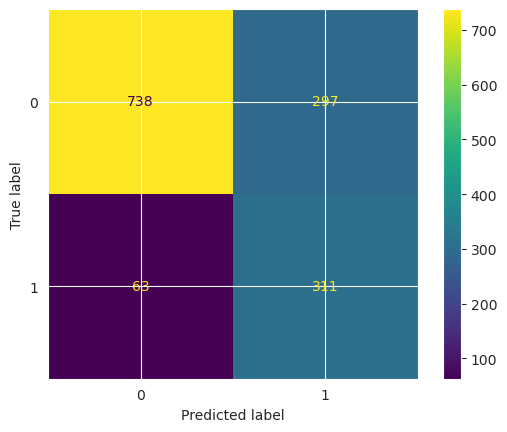

In [206]:
ConfusionMatrixDisplay.from_estimator(RF_model, X_test, y_test)
plt.show()

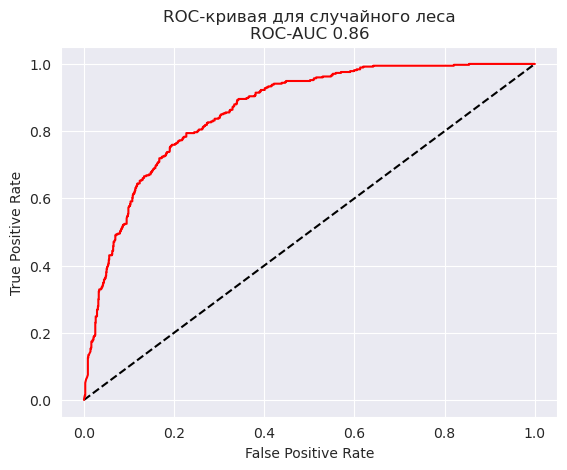

In [16]:
y_pred_prob = RF_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC-кривая для случайного леса\nROC-AUC {roc_auc:.2f}')
plt.show()

### Экстримальный бустинг

In [57]:
import functools
import optuna
from sklearn.metrics import accuracy_score, f1_score

def opt(X_train, y_train, X_test, y_test, trial):
    #param_list
    n_estimators = trial.suggest_int('n_estimators', 0, 1000)
    max_depth = trial.suggest_int('max_depth', 1, 20)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 20)
    learning_rate = trial.suggest_discrete_uniform('learning_rate', 0.01, 0.1, 0.01)
    scale_pos_weight = trial.suggest_int('scale_pos_weight', 1, 100)
    subsample = trial.suggest_discrete_uniform('subsample', 0.5, 0.9, 0.1)
    colsample_bytree = trial.suggest_discrete_uniform('colsample_bytree', 0.5, 0.9, 0.1)

    xgboost_tuna = XGBClassifier(
        random_state=42,
        # tree_method='gpu_hist',
        n_estimators = n_estimators,
        max_depth = max_depth,
        min_child_weight = min_child_weight,
        #learning_rate = learning_rate,
        scale_pos_weight = scale_pos_weight,
        subsample = subsample,
        colsample_bytree = colsample_bytree,
    )
    xgboost_tuna.fit(X_train, y_train)
    tuna_pred_test = xgboost_tuna.predict(X_test)
    # tuna_f1_score = f1_score(y_test, tuna_pred_test)

    return (1.0 - (f1_score(y_test, tuna_pred_test)))

study = optuna.create_study()
study.optimize(functools.partial(opt, X_small_over[:-1000], y_small_over[:-1000], X_small_over[-1000:], y_small_over[-1000:]), n_trials=100)

[I 2026-01-26 19:29:46,607] A new study created in memory with name: no-name-03ed156d-49b2-4966-acdf-d98b91f28b9d
[I 2026-01-26 19:29:47,278] Trial 0 finished with value: 0.0 and parameters: {'n_estimators': 276, 'max_depth': 11, 'min_child_weight': 13, 'learning_rate': 0.09, 'scale_pos_weight': 67, 'subsample': 0.5, 'colsample_bytree': 0.5}. Best is trial 0 with value: 0.0.
[I 2026-01-26 19:29:49,034] Trial 1 finished with value: 0.0 and parameters: {'n_estimators': 927, 'max_depth': 2, 'min_child_weight': 9, 'learning_rate': 0.05, 'scale_pos_weight': 99, 'subsample': 0.5, 'colsample_bytree': 0.5}. Best is trial 0 with value: 0.0.
[I 2026-01-26 19:29:49,276] Trial 2 finished with value: 0.0 and parameters: {'n_estimators': 204, 'max_depth': 20, 'min_child_weight': 20, 'learning_rate': 0.09, 'scale_pos_weight': 35, 'subsample': 0.8, 'colsample_bytree': 0.6}. Best is trial 0 with value: 0.0.
[I 2026-01-26 19:29:49,507] Trial 3 finished with value: 0.0 and parameters: {'n_estimators': 20

In [56]:
X_small_over[:-1000].shape

(7278, 10)

In [45]:
study.best_params

{'n_estimators': 244,
 'max_depth': 1,
 'min_child_weight': 19,
 'scale_pos_weight': 1,
 'subsample': 0.6,
 'colsample_bytree': 0.6}

In [40]:
clf = XGBClassifier(**study.best_params)
clf.fit(X_small_over, y_small_over)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [58]:
clf = XGBClassifier(**study.best_params)
clf.fit(X_small_over, y_small_over)
XGB_pred= clf.predict(X_test_small)
y_pred_prob = clf.predict_proba(X_test_small)[:,1]
roc_auc = roc_auc_score(y_test_small, y_pred_prob)
print("AUC экстримального бустинга:", roc_auc)
report = classification_report(y_test_small, XGB_pred)
print(report)

AUC экстримального бустинга: 0.843296132682322
              precision    recall  f1-score   support

           0       0.97      0.47      0.64      1035
           1       0.40      0.95      0.56       374

    accuracy                           0.60      1409
   macro avg       0.68      0.71      0.60      1409
weighted avg       0.81      0.60      0.62      1409



In [49]:
xgboost_params = {'n_estimators': 244,
 'max_depth': 1,
 'min_child_weight': 19,
 'scale_pos_weight': 1,
 'subsample': 0.6,
 'colsample_bytree': 0.6}
XGB_model = XGBClassifier(**xgboost_params)
XGB_model.fit(X_small_over, y_small_over)
XGB_pred= XGB_model.predict(X_test_small)
recall = recall_score(y_test, XGB_pred)
y_pred_prob = XGB_model.predict_proba(X_test_small)[:,1]
roc_auc = roc_auc_score(y_test_small, y_pred_prob)
print("AUC экстримального бустинга:", roc_auc)
report = classification_report(y_test_small, XGB_pred)
print(report)

AUC экстримального бустинга: 0.8677168100441757
              precision    recall  f1-score   support

           0       0.93      0.73      0.82      1035
           1       0.53      0.84      0.65       374

    accuracy                           0.76      1409
   macro avg       0.73      0.79      0.73      1409
weighted avg       0.82      0.76      0.77      1409



In [50]:
XGB_model = XGBClassifier(**xgboost_params)
cv_scores = cross_val_score(XGB_model, X_small_over, y_small_over, cv=5, scoring='roc_auc')
print(f"AUC = {cv_scores.mean():.4f}")

AUC = 0.8431


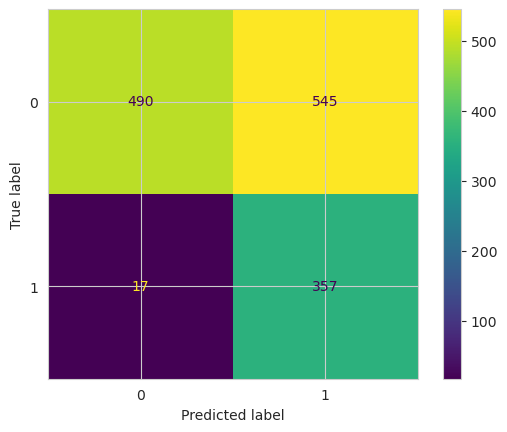

In [59]:
ConfusionMatrixDisplay.from_estimator(clf, X_test_small, y_test_small)
plt.show()

In [6]:
XGB_model = XGBClassifier(n_estimators=100, learning_rate=0.1)
XGB_model.fit(X_small_over,y_small_over)
accuracy_XGB = XGB_model.score(X_test_small, y_test_small)
print("Точность экстримального бустинга:", accuracy_XGB)
XGB_pred= XGB_model.predict(X_test_small)
report = classification_report(y_test_small, XGB_pred)
print(report)

Точность экстримального бустинга: 0.7565649396735273
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1035
           1       0.53      0.78      0.63       374

    accuracy                           0.76      1409
   macro avg       0.72      0.76      0.72      1409
weighted avg       0.80      0.76      0.77      1409



In [35]:
mlflow.xgboost.autolog()

with mlflow.start_run():
    XGB_model = XGBClassifier(n_estimators=40, learning_rate=0.1, scale_pos_weight=4)
    XGB_model.fit(X_train,y_train)
    accuracy_XGB = XGB_model.score(X_test, y_test)
    XGB_pred= XGB_model.predict(X_test)
    test_f1_score = f1_score(y_test, XGB_pred)
    print("F1-мера экстримального бустинга:", test_f1_score)
    report = classification_report(y_test, XGB_pred)
    y_pred_prob = XGB_model.predict_proba(X_test)[:,1]
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    mlflow.log_metric("test_roc_auc", roc_auc)
    mlflow.log_metric("test_f1_score", test_f1_score)
    print(report)

2025/12/14 23:13:15 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


F1-мера экстримального бустинга: 0.6404040404040404
              precision    recall  f1-score   support

           0       0.93      0.71      0.81      1035
           1       0.51      0.85      0.64       374

    accuracy                           0.75      1409
   macro avg       0.72      0.78      0.72      1409
weighted avg       0.82      0.75      0.76      1409

🏃 View run painted-squirrel-910 at: http://localhost:5000/#/experiments/848997376009285123/runs/aca162dfedac44b39e97de1e283b948c
🧪 View experiment at: http://localhost:5000/#/experiments/848997376009285123


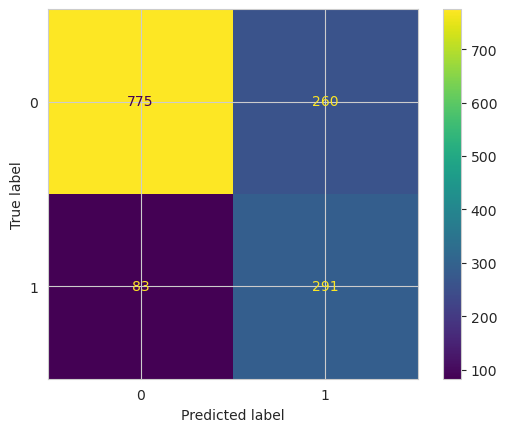

In [8]:
matrix = ConfusionMatrixDisplay.from_predictions(y_test_small, XGB_pred)
plt.show()

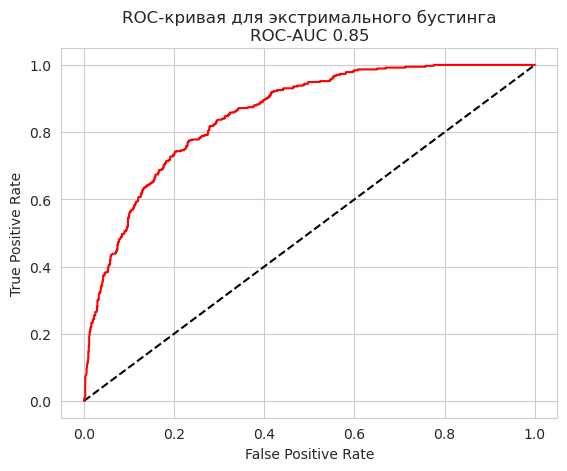

In [17]:
y_pred_prob = XGB_model.predict_proba(X_test_small)[:,1]
fpr, tpr, thresholds = roc_curve(y_test_small, y_pred_prob)
roc_auc = roc_auc_score(y_test_small, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC-кривая для экстримального бустинга\nROC-AUC {roc_auc:.2f}')
plt.show()

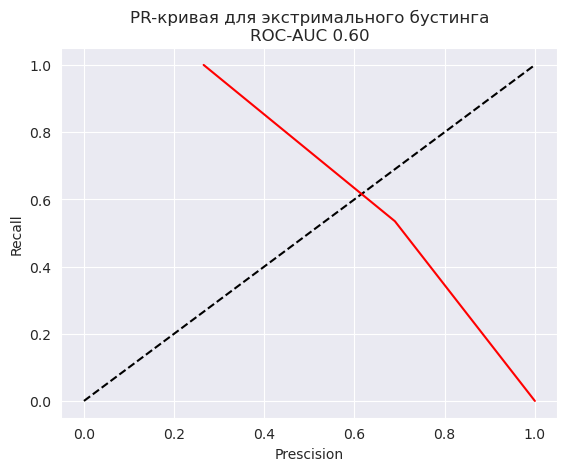

In [127]:
prescision, recall, thresholds = precision_recall_curve(y_test, XGB_pred)
test_f1_score = f1_score(y_test, XGB_pred)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(prescision, recall, label='Logistic Regression',color = "r")
plt.xlabel('Prescision')
plt.ylabel('Recall')
plt.title(f'PR-кривая для экстримального бустинга\nROC-AUC {test_f1_score:.2f}')
plt.show()

### Категориальный бустинг

In [44]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

# Определение сетки параметров
param_grid = {
    'iterations': [50, 100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5, 0.6],
    # 'depth': [4, 6, 8],
    # 'l2_leaf_reg': [1, 3, 5]
}

# Создание модели
model = CatBoostClassifier(depth=3, l2_leaf_reg=1, custom_metric='AUC', random_seed=42, logging_level="Silent")

# Поиск по сетке
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='roc_auc', n_jobs=-1, verbose=1)

grid_search.fit(X_train_over, y_train_over)

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучший результат: {grid_search.best_score_:.4f}")

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Лучшие параметры: {'iterations': 400, 'learning_rate': 0.6}
Лучший результат: 0.8965


In [59]:
CB_model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.05,
    depth=3,
    # l2_leaf_reg=1,
    # custom_metric='AUC',
    logging_level="Silent",
    random_seed=42,
)
CB_model.fit(X_train_over, y_train_over)
CB_pred= CB_model.predict(X_test)
recall = recall_score(y_test, CB_pred)
y_pred_prob = CB_model.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("AUC категориального бустинга:", roc_auc)
report = classification_report(y_test, CB_pred)
print(report)

AUC категориального бустинга: 0.8717132966493579
              precision    recall  f1-score   support

           0       0.93      0.76      0.83      1035
           1       0.55      0.83      0.66       374

    accuracy                           0.78      1409
   macro avg       0.74      0.79      0.75      1409
weighted avg       0.83      0.78      0.79      1409



In [58]:
CB_model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.05,
    depth=3,
    l2_leaf_reg=2,
    custom_metric='AUC',
    logging_level="Silent",
    random_seed=42,
)
cv_scores = cross_val_score(CB_model, X_train, y_train, cv=5, scoring='roc_auc')
print(f"AUC = {cv_scores.mean():.4f}")

AUC = 0.8441


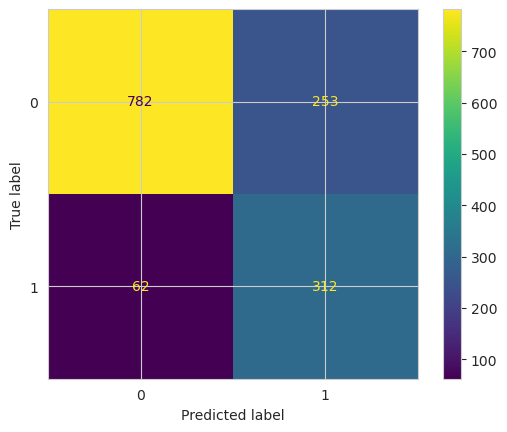

In [60]:
ConfusionMatrixDisplay.from_estimator(CB_model, X_test, y_test)
plt.show()

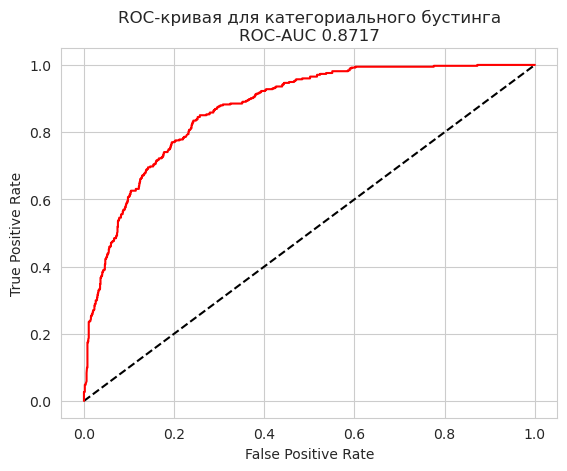

In [61]:
y_pred_prob = CB_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC-кривая для категориального бустинга\nROC-AUC {roc_auc:.4f}')
plt.show()

### Используем комбинацию из трёх моделей

В качестве эксперимента попробуем объединить результаты предсказания нескольких слабых моделей

* Наивный байесовский классификатор
* Логистическая регрессия
* Случайный лес

In [113]:
X_test.shape

(1409, 10)

In [191]:
from sklearn.base import BaseEstimator

class CombineModel(BaseEstimator):
    def __init__(self, estimators):
        self.estimators = estimators
        self.y_preds = None
        self.y_pred_res = None

    def fit(self, X, y):
        for estimator in self.estimators:
            estimator.fit(X, y)

    def predict(self, X):
        self.y_preds = np.empty((X.shape[0], 0))
        for estimator in self.estimators:
            est_pred = estimator.predict(X)
            self.y_preds = np.column_stack((self.y_preds, est_pred)).astype(int)
        self.y_pred_res = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=self.y_preds)
        return self.y_pred_res

    def score(self, y_test):
        recall = recall_score(y_test, self.y_pred_res)
        report = classification_report(y_test, self.y_pred_res)
        f1 = f1_score(y_test, self.y_pred_res)
        for i in range(len(self.estimators)):
            small_recall = recall_score(y_test, self.y_preds[:, i])
            small_f1 = f1_score(y_test, self.y_preds[:, i])
            print(self.estimators[i])
            print(f'Полнота:', small_recall)
            print('F1-score:', small_f1)
        print('Полнота результирующего ответа:', recall)
        print('F1-score:', f1)
        print(report)

    def show_cm(self):
        cm = confusion_matrix(y_test, NB_pred)
        matrix = ConfusionMatrixDisplay(confusion_matrix=cm)
        matrix.plot(cmap=plt.cm.Blues)
        plt.title('Матрица ошибок')
        plt.show()

In [194]:
NB_model = GaussianNB()
LR_model = LogisticRegression()
DT_model = DecisionTreeClassifier(max_depth=7, max_leaf_nodes=20)
models = [NB_model, LR_model, DT_model]
BigM = CombineModel(models)
BigM.fit(X_train, y_train)
BM_pred = BigM.predict(X_test)
BigM.score(y_test)

GaussianNB()
Полнота: 0.8850267379679144
F1-score: 0.609015639374425
LogisticRegression()
Полнота: 0.5080213903743316
F1-score: 0.5748865355521936
DecisionTreeClassifier(max_depth=7, max_leaf_nodes=20)
Полнота: 0.5053475935828877
F1-score: 0.5851393188854489
Полнота результирующего ответа: 0.6203208556149733
F1-score: 0.6312925170068027
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1035
           1       0.64      0.62      0.63       374

    accuracy                           0.81      1409
   macro avg       0.75      0.75      0.75      1409
weighted avg       0.81      0.81      0.81      1409



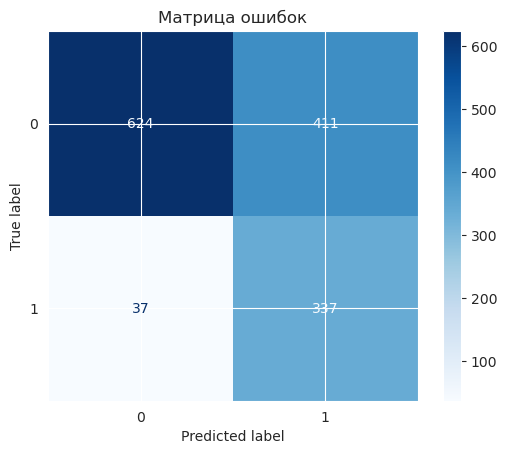

In [196]:
BigM.show_cm()